In [2]:
# 1. Importar bibliotecas necessárias
import cv2
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

caminho_imagem = '/content/drive/MyDrive/filmes/ponte-estaiada-tipos-e-caracteristicas.jpg'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 2. Carregar a imagem
# Substitua 'ponte.jpg' pelo caminho da sua imagem ou URL
imagem = cv2.imread(caminho_imagem)
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)  # Converter para tons de cinza
# 3. Suavizar a imagem
# Aplicar GaussianBlur para reduzir ruídos
imagem_suave = cv2.GaussianBlur(imagem_cinza, (7, 7), 0)

# 4. Aplicar a binarização
# Threshold binário
_, binarizada = cv2.threshold(imagem_suave, 160, 255, cv2.THRESH_BINARY)

# Threshold binário invertido
_, binarizada_invertida = cv2.threshold(imagem_suave, 160, 255, cv2.THRESH_BINARY_INV)

# 5. Exibir os resultados lado a lado
# Combinar as imagens em uma só para facilitar a visualização
resultado = cv2.hconcat([
    cv2.vconcat([imagem_suave, binarizada]),
    cv2.vconcat([binarizada_invertida, cv2.bitwise_and(imagem_cinza, imagem_cinza, mask=binarizada_invertida)])
])

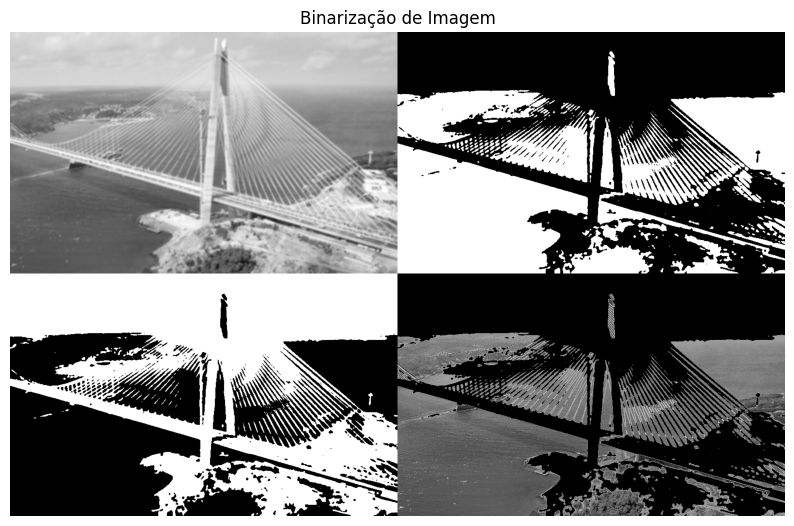

In [5]:
# Mostrar a imagem combinada
plt.figure(figsize=(10, 10))
plt.title("Binarização de Imagem")
plt.imshow(resultado, cmap='gray')
plt.axis('off')
plt.show()
